In [1]:
%matplotlib inline
!pip install wordcloud

import requests
from collections import Counter
import random
from wordcloud import WordCloud

    100% |████████████████████████████████| 368kB 16.2MB/s ta 0:00:01


In [2]:
def someDictValue(o):
    for value in o.values():
        return value

In [3]:
stopwords = [
    'International Standard Book Number',
    'Digital object identifier',
    'Intergovernmental Panel on Climate Change',
    'PubMed Identifier',
    'Bibcode',
    'International Standard Serial Number',
    'International Standard Name Identifier',
    'Integrated Authority File',
    'Library of Congress Control Number',
    'National Diet Library',
    'JSTOR',
    'Wikilink',
    'PubMed Central',
    'CiteSeerX',
    'Bibliothèque nationale de France',
    'National Library of the Czech Republic',
    'Système universitaire de documentation',
    'Biblioteca Nacional de España',
    'Virtual International Authority File',
    'WorldCat Identities',
    'Wayback Machine',
    'AllMusic',
    'The New York Times',
    'Bibsys',
    'MusicBrainz'
]

In [4]:
def wikipediaLinks(topic):
    apiResult = requests.get(
        'https://en.wikipedia.org/w/api.php', 
        params = {
            "action": "query",
            "titles": topic,
            "prop": "links",
            "format": "json",
            "plnamespace": [0],
            "pllimit": 500
        }).json()
    page = someDictValue(apiResult["query"]["pages"])
    titles = []
    for link in page.get("links", []):
        if not link["title"] in stopwords:
            titles.append(link["title"])
    return titles

def getCoLinks(topic, limit=10, verbose=True):
    linkshere = wikipediaLinks(topic)
    random.shuffle(linkshere)
    linkshere = linkshere[0:limit]
    coLinks = []
    i = 0
    for parentTopic in linkshere:
        i = i + 1
        if verbose:
            print(i, len(linkshere), parentTopic)
        coLinks = coLinks + wikipediaLinks(parentTopic)        
    return Counter(coLinks).most_common()

In [5]:
def draw_WordCloud(topic, limit=500, verbose=False):
    freqs = dict(getCoLinks(topic, limit, verbose))
    wordcloud = WordCloud(
        width=1100,
        height=400,
        max_words=4000,
        background_color= 'white', 
        max_font_size=400,
        random_state=123
    ).generate_from_frequencies(freqs)
    return wordcloud.to_image()

# Data Workshop – inf.ku.dk

Marts 2019, _Rasmus Erik @ veduz.com_

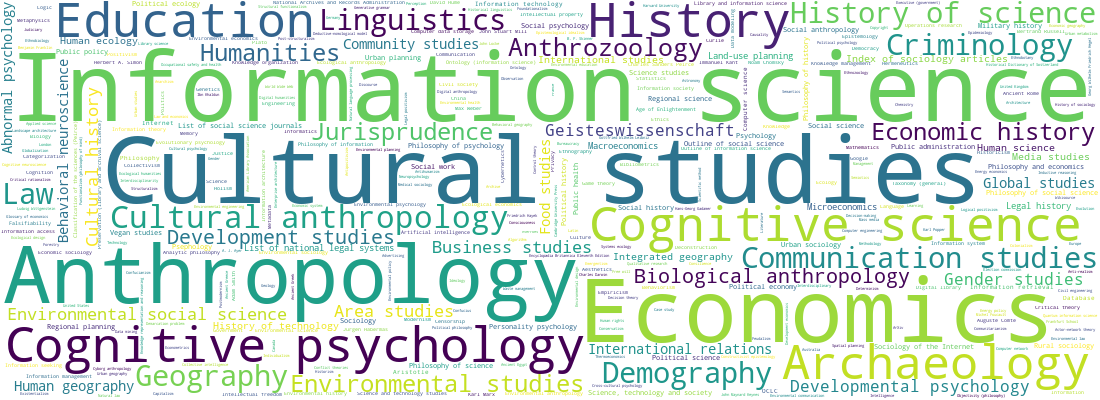

In [6]:
draw_WordCloud("Information science")

# Intro

- Plan for i dag: _1. introduktion til jupyter notebooks gennem eksempel med wordcloud, 2. emner efter eget valg._ Agenda.
- Undervisningsform: interaktivt, stil gerne spørgsmål undervejs, - undervisningen tilpasses jeres interesser. Skift mellem teori og hands-on.
- Om workshoppen, min baggrund, jeres baggrund, motivation
- ***I gang med Jupyter Notebooks*** – Hvad er Jupyter Notebook, hosted vs lokal, debugging, gennemgang af grænseflade, celletyper, regnemaskine, navngivning, gentagelse

## Agenda

- Intro – ___I gang med Jupyter Notebooks___
- Hvad er computersprog – ___Python og WordCloud visualisering___
- Data - typer og struktur – ___Udtræk af data fra reddit og wikipedia___
- Problemløsning –  ___WordCloud over relaterede emner___

Derefter frit emnevalg: ___Data Science___ eller ___Hvordan virker internettet___ eller ___Visualisering: hvad er farver og digitale billeder___ eller ___Python, HTML, Markdown, JavaScript og andre sprog___ eller ___Forskningsanalyse: bibliometri___ eller ___case efter jeres valg___ eller ...

# Computersprog

- Analogi: et fremmed land
- Eksempler på typer af sprog: Programmering (Python, JavaScript, ...), Markup (HTML, Markdown), Data (JSON, XML, ...)
- Hvad er og kan en computer (forvokset regnemaskine)
- ___I gang med Python___ – regnemaskine, tekstoperationer, navngivning, import af funktionalitet, WordCloud, hente tekster fra nettet, "tilfældige" citater

## Agenda

- Intro – ___I gang med Jupyter Notebooks___
- Hvad er computersprog – ___Python og WordCloud visualisering___
- Data - typer og struktur – ___Udtræk af data fra reddit og wikipedia___
- Problemløsning –  ___WordCloud over relaterede emner___

Derefter frit emnevalg: ___Data Science___ eller ___Hvordan virker internettet___ eller ___Visualisering: hvad er farver og digitale billeder___ eller ___Python, HTML, Markdown, JavaScript og andre sprog___ eller ___Forskningsanalyse: bibliometri___ eller ___case efter jeres valg___ eller ...

# Data

- Data, information, viden, visdom. Entropi, Kolmogorov kompleksitet.
- Strukturer i data og typer: tekst, tal, sandhedsværdier, lister, ordbøger. JSON.
- ___Udtræk af data fra reddit og wikipedia___ – oprettelse af datastrukturer, tilgang til datastrukturer, gennemløb af lister, APIer, indlæsning af data fra reddit, indlæsning af data fra wikipedia

## Agenda

- Intro – ___I gang med Jupyter Notebooks___
- Hvad er computersprog – ___Python og WordCloud visualisering___
- Data - typer og struktur – ___Udtræk af data fra reddit og wikipedia___
- Problemløsning –  ___WordCloud over relaterede emner___

Derefter frit emnevalg: ___Data Science___ eller ___Hvordan virker internettet___ eller ___Visualisering: hvad er farver og digitale billeder___ eller ___Python, HTML, Markdown, JavaScript og andre sprog___ eller ___Forskningsanalyse: bibliometri___ eller ___case efter jeres valg___ eller ...

# Problemløsning

- 1) Forstå problemet 2) læg en plan 3) udfør den 4) reflekter – (Pólya)
- Abstraktioner, og opdel i mindre dele.
- ___Visualisering af overblik over relevante artikler ud fra wikipedia-artikel___ funktionsdefinitioner, refaktorering, stop-ord, inkrementel udvikling

## Agenda

- Intro – ___I gang med Jupyter Notebooks___
- Hvad er computersprog – ___Python og WordCloud visualisering___
- Data - typer og struktur – ___Udtræk af data fra reddit og wikipedia___
- Problemløsning –  ___WordCloud over relaterede emner___

Derefter frit emnevalg: ___Data Science___ eller ___Hvordan virker internettet___ eller ___Visualisering: hvad er farver og digitale billeder___ eller ___Python, HTML, Markdown, JavaScript og andre sprog___ eller ___Forskningsanalyse: bibliometri___ eller ___case efter jeres valg___ eller ...